<a href="https://colab.research.google.com/github/Srishti20022/Data-Science/blob/main/Handwritten_Digit_Classification_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [96]:
def knn(x, y, queryPoint, k=5):
    vals = []
    m = x.shape[0]
    for i in range(m):
        d = dist(queryPoint, x[i])
        vals.append((d, y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:, 1], return_counts = True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [97]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnit data/train.csv')
df.shape

(42000, 785)

In [98]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [99]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
data = df.values
# data.shape
print(type(data))

<class 'numpy.ndarray'>


In [101]:
# pixels
x = data[:, 1:]
# label
y = data[:, 0]

print(x.shape, y.shape)

(42000, 784) (42000,)


In [102]:
# put 80 % data for training and rest 20 for testing
# 28*28 pixels = 784
# split = int(0.95*(x.shape[0]))
split = 41000
x_train = x[:split, :]
x_test = x[split:, :]

y_train = y[:split]
y_test = y[split:]

print("Training data shape : ",x_train.shape, y_train.shape)
print("Testing data shape : ",x_test.shape, y_test.shape)

Training data shape :  (41000, 784) (41000,)
Testing data shape :  (1000, 784) (1000,)


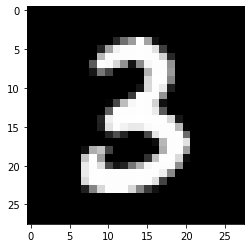

In [103]:
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap='gray')
    plt.show()

drawImg(x_test[110])

In [104]:
Prediction = knn(x_train, y_train, x_test[11])
print(int(Prediction))

1


In [105]:
len1 = (y_test.shape[0])
corr_pred = 0.0
prediction = []
for i in range (len1):
    pred = knn(x_train, y_train, x_test[i])
    if pred == y_test[i]:
        corr_pred = corr_pred + 1

# accuracy = correct_predictions/total_predictions
accuracy = corr_pred/len1

print(f"Accuracy of model : {accuracy}")

Accuracy of model : 0.972


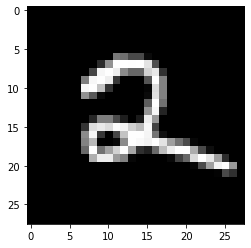

Label : 2.0




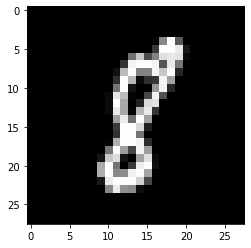

Label : 8.0




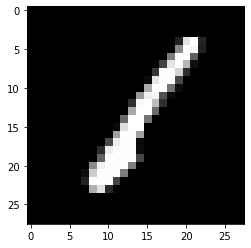

Label : 1.0




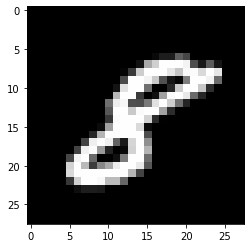

Label : 8.0




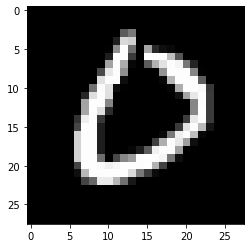

Label : 0.0




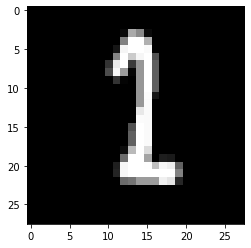

Label : 1.0




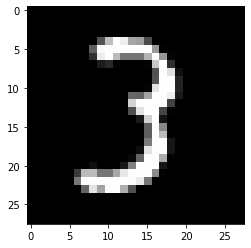

Label : 3.0




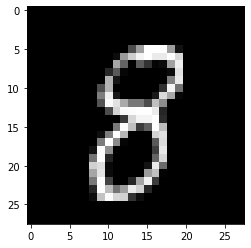

Label : 8.0




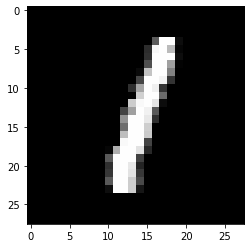

Label : 1.0




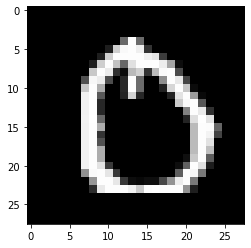

Label : 0.0




In [107]:
for i in range(10):
    label = knn(x_train, y_train, x_test[i])
    drawImg(x_test[i])
    print(f"Label : {label}\n\n")